In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
def get_dataset(mean,var,n=100):# y= 4x +5 
    x = np.random.uniform(1,100,size=n)
    y = 4*x + 5 + np.random.normal(mean,var,n)
    df = pd.DataFrame({'x': x,'y':y})
    return df

In [120]:
def linear_reg(df,lr = 0.0001,n=100):
    m=1
    c=1
    loss = []
    for i in range(n):
        pred = m*df['x']+c
        mse = np.mean((df['y']-pred)**2)
        grad_m = np.mean(2*(-df['y']+pred)*df['x'])
        grad_c = np.mean(2*(-df['y']+pred))
        m-=lr*grad_m
        c-=lr*grad_c
        loss.append(mse)
    return m,c,loss

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


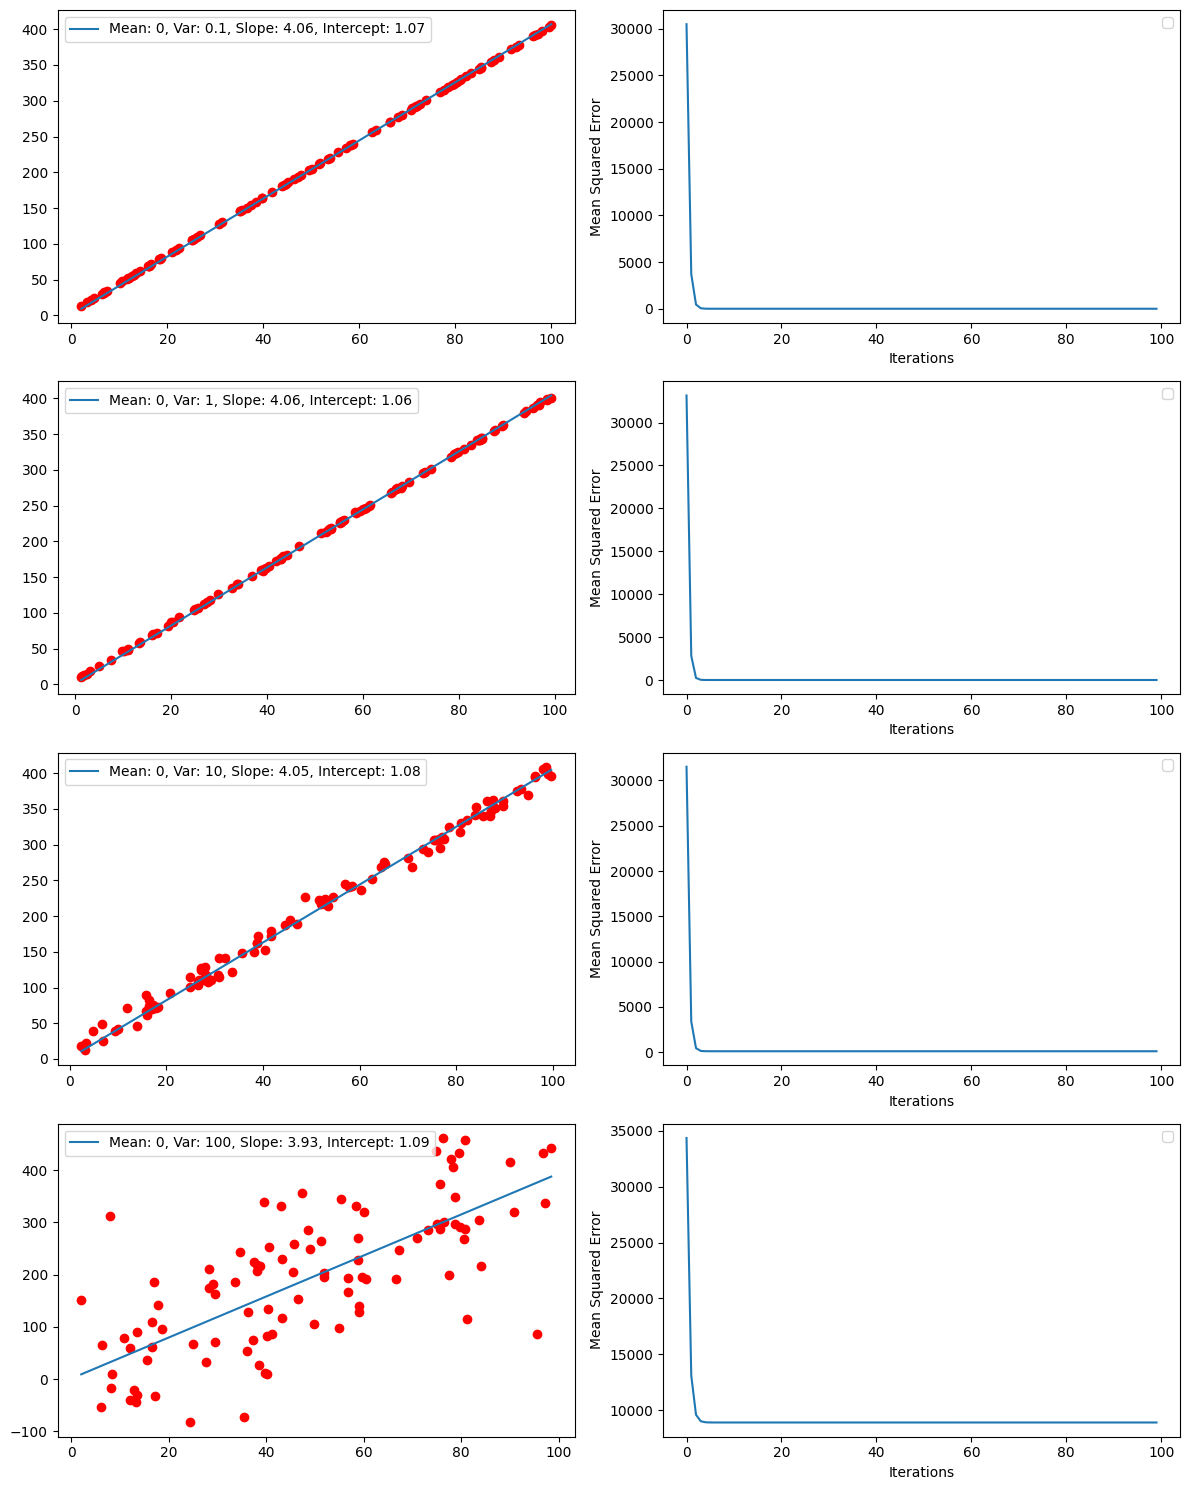

In [121]:
fig, axs = plt.subplots(4, 2, figsize=(12, 15))
for idx, var in enumerate([0.1, 1, 10,100]):
    df = get_dataset(0, var)
    m, c, loss = linear_reg(df)

    # Plot the linear regression line
    x_values = np.linspace(min(df['x']), max(df['x']), 100)
    y_values = m * x_values + c
    axs[idx, 0].plot(x_values, y_values, label=f"Mean: 0, Var: {var}, Slope: {m:.2f}, Intercept: {c:.2f}")
    axs[idx, 0].scatter(df['x'], df['y'], color='red')
    axs[idx, 0].legend()

    # Plot the loss
    axs[idx, 1].plot(loss)
    axs[idx, 1].set_xlabel('Iterations')
    axs[idx, 1].set_ylabel('Mean Squared Error')
    axs[idx, 1].legend()

plt.tight_layout()
plt.show()